In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import glob

In [58]:
df_learn_lst = []
df_runtime_lst = []

#for data_file in glob.glob("../experiments/mc/randman/results_data/df_learn_*.csv"):
for data_file in glob.glob("../experiments/mc/randman/df_learn_*.csv"):
    df_learn_lst.append(pd.read_csv(data_file))

for data_file in glob.glob("../experiments/mc/randman/results_data/df_runtime_*.csv"):
    df_runtime_lst.append(pd.read_csv(data_file))



df_learn = pd.concat(df_learn_lst, ignore_index=True)
df_runtime = pd.concat(df_runtime_lst, ignore_index=True)


df_learn["N Synapses"] = df_learn["N Input"] * df_learn["N Hidden"] +  df_learn["N Hidden"] * df_learn["N Output"]
df_runtime["N Synapses"] = df_runtime["N Input"] * df_runtime["N Hidden"] +  df_runtime["N Hidden"] * df_runtime["N Output"]

In [52]:
df_learn

,Epoch,Sim ID,Accuracy,Loss,Model,Method,Event Threshold,N Input,N Hidden,N Output,N Synapses
0,0.000000,0,0.113281,0.315846,Event,Feedback Align,0.0001,20,10,10,300
1,166.666667,0,0.128906,0.094997,Event,Feedback Align,0.0001,20,10,10,300
2,333.333333,0,0.247396,0.089565,Event,Feedback Align,0.0001,20,10,10,300
3,500.000000,0,0.329427,0.082287,Event,Feedback Align,0.0001,20,10,10,300
4,666.666667,0,0.399740,0.076951,Event,Feedback Align,0.0001,20,10,10,300
5,833.333333,0,0.423177,0.074111,Event,Feedback Align,0.0001,20,10,10,300
6,1000.000000,0,0.471354,0.070940,Event,Feedback Align,0.0001,20,10,10,300
7,1166.666667,0,0.484375,0.068960,Event,Feedback Align,0.0001,20,10,10,300
8,1333.333333,0,0.500000,0.068110,Event,Feedback Align,0.0001,20,10,10,300
9,1500.000000,0,0.506510,0.067509,Event,Feedback Align,0.0001,20,10,10,300


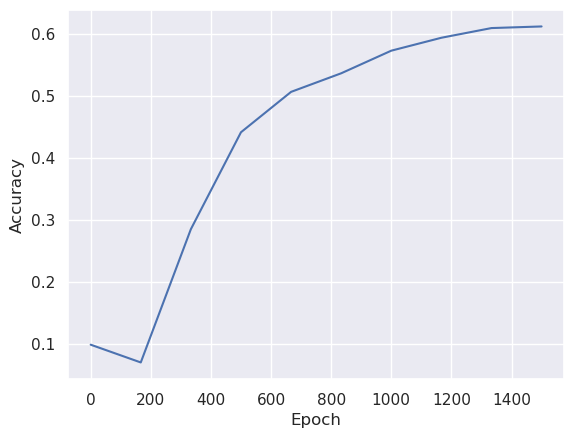

In [59]:
fig, ax = plt.subplots()

sns.lineplot(df_learn, x="Epoch", y="Accuracy")

plt.show()

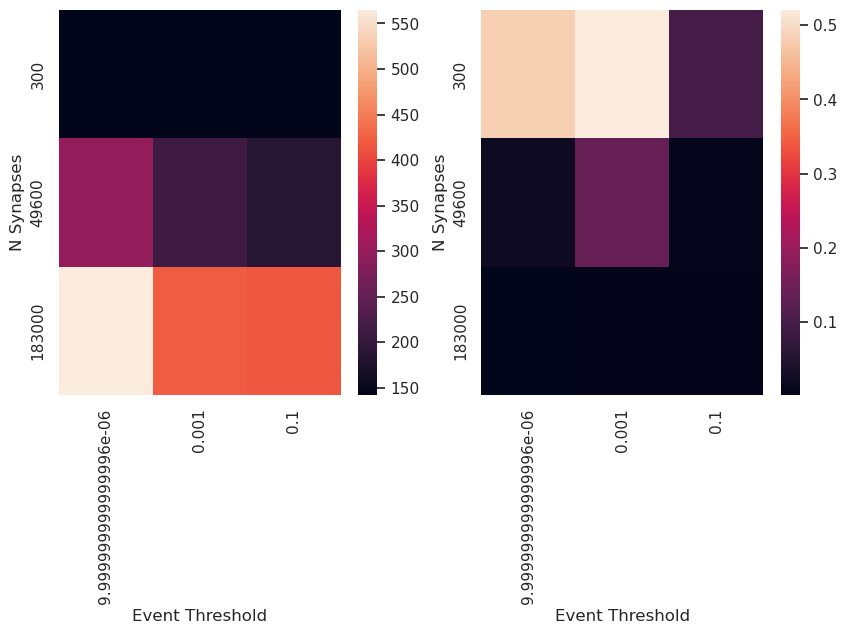

In [34]:
rt_event_fb_algn = pd.pivot_table(df_runtime[(df_runtime["Model"] == "Event") & (df_runtime["Method"] == "Feedback Align")],
               values="Runtime", columns="Event Threshold", index="N Synapses", aggfunc="mean")

acc_event_fb_algn = pd.pivot_table(df_learn[(df_learn["Model"] == "Event") & (df_learn["Method"] == "Feedback Align")
                                             & (df_learn["Epoch"] == 1500.)],
               values="Accuracy", columns="Event Threshold", index="N Synapses", aggfunc="mean")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(rt_event_fb_algn, ax=ax[0])
sns.heatmap(acc_event_fb_algn, ax=ax[1])

plt.show()

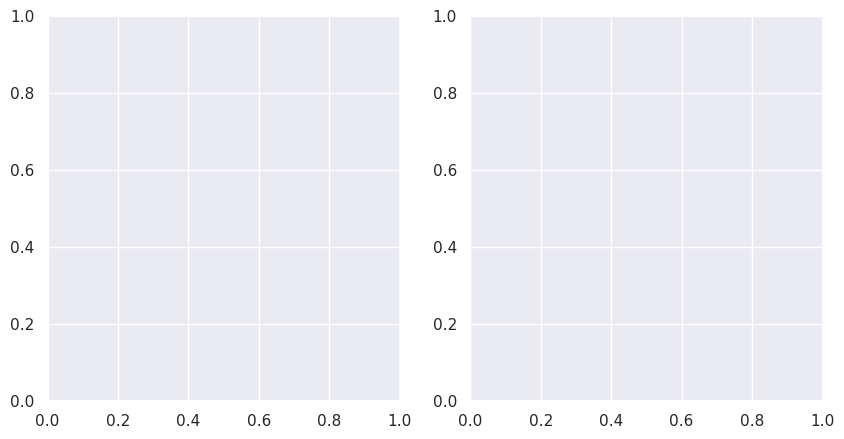

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))



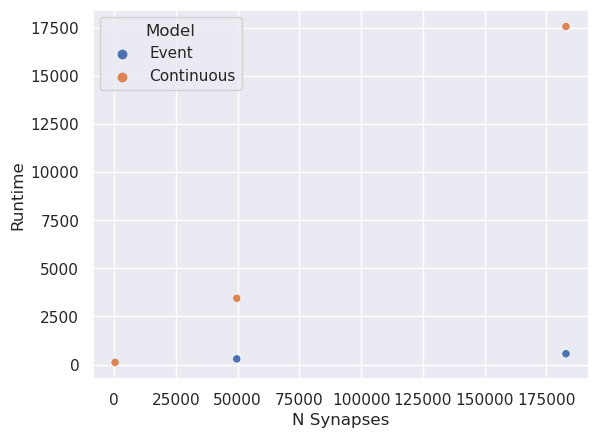

In [16]:
fig, ax = plt.subplots(1,1)

sns.scatterplot(df_runtime[(df_runtime["Method"]=="Feedback Align") & (df_runtime["Event Threshold"] <= 1e-5)],
                x="N Synapses", y="Runtime",
                hue="Model", ax=ax)

#ax.set_ylim(top=1000)
#ax.set_xlim(right=50000)
#ax.set_yscale("log")

plt.show()

In [5]:
df_runtime[(df_runtime["Method"]=="Backprop") & (df_runtime["Spike Threshold"] <= 1e-5) & (df_runtime["Model"]=="Rate")]3

,Runtime,Sim ID,Model,Method,N Input,N Hidden,N Output,Spike Threshold,N Synapses
15,124.008528,0,Rate,Backprop,52,42,42,0.0,3948
89,76.294317,0,Rate,Backprop,20,10,10,0.0,300
143,973.841253,0,Rate,Backprop,148,138,138,0.0,39468
170,628.349918,0,Rate,Backprop,116,106,106,0.0,23532
200,313.285785,0,Rate,Backprop,84,74,74,0.0,11692


In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

sns.lineplot(df_learn[df_learn["Method"] == "Feedback Align"],
             x="Epoch", y="Feedback Weight Alignment", hue="Model", ax=ax[0])

sns.lineplot(df_learn[df_learn["Method"] == "Feedback Align"],
             x="Epoch", y="Self-Prediction Forward Weight Alignment", hue="Model", ax=ax[1])

sns.lineplot(df_learn[df_learn["Method"] == "Feedback Align"],
             x="Epoch", y="Self-Prediction Backward Weight Alignment", hue="Model", ax=ax[2])

sns.lineplot(df_learn[(df_learn["Method"] == "Feedback Align") & (df_learn["Epoch"] <= 10)],
             x="Epoch", y="Self-Prediction Bias Alignment", hue="Model", ax=ax[3])

fig.tight_layout(pad=1.0)

plt.show()